# Beer Flavor Characteristics
Looking at top 100 rated American Imperial Stouts and American Double IPAs on BeerAdvocate.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import time
from __future__ import division
import math
import string
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import random
from scipy.misc import imread
import textwrap
from scipy import ndimage

In [3]:
ImpStouts_list = pd.read_csv('Top_100_ImpStouts.csv', index_col = 0)
ImpStouts_char = pd.read_csv('Top_100_ImpStouts_Chars.csv', index_col = 0)
ImpStouts_data = pd.read_csv('Top_100_ImpStouts_Reviews.csv', index_col = 0)

DIPAs_list = pd.read_csv('Top_100_DIPAs.csv', index_col = 0)
DIPAs_char = pd.read_csv('Top_100_DIPAs_Chars.csv', index_col = 0)
DIPAs_data = pd.read_csv('Top_100_DIPAs_Reviews.csv', index_col = 0)

taste = set([u'acidic', u'acidity', u'alcohol', u'alcoholic', u'almond', u'almonds', u'ash', u'ashy', u'astringency', \
             u'astringent', u'bacon', u'berries', u'berry', u'biscuit', u'bite', u'bitter', u'booze', u'boozey', \
             u'booziness', u'boozy', u'bitterness', u'bittersweet', u'bourbon', u'bourbony', u'brandy', u'bread', \
             u'bready', u'brownie', u'brownies', u'burn', u'burned', u'burning', u'burns', u'burnt', u'butter', \
             u'butterscotch', u'buttery', u'cafe', u'cappuccino', u'caramel', u'chalky', u'charred', u'cherries', \
             u'cherry', u'chile', u'chiles', u'chili', u'chilies', u'chilis', u'chilled', u'chilli', u'chillies', \
             u'chocolate', u'chocolately', u'chocolates', u'chocolatey', u'chocolaty', u'cinnamon', u'citrus', \
             u'city', u'coco', u'cocoa', u'coconut', u'coffe', u'coffee', u'cola', u'cookie', u'cookies',  u'cream', \
             u'creaminess', u'creamy', u'creme', u'dense', u'dryness', u'earth', u'earthiness', u'earthy', \
             u'espresso', u'esters', u'ethanol', u'fruit', u'fruitiness', u'fruits', u'fruity', u'fudge', u'fudgey', \
             u'fudgy', u'grainy',  u'grassy', u'habanero', u'hazelnut', u'hazelnuts', u'herbal', u'herbal', u'hoppy', \
             u'java', u'lactic', u'lactose', u'lactic', u'lactose', u'latte', u'liqueur', u'licorice', u'liquor', \
             u'liquorice', u'maltiness', u'malty', u'maple', u'marshmallow', u'marshmallows', u'milk', u'milkshake', \
             u'milky', u'mocha', u'molasses', u'mousse', u'nut', u'nutmeg', u'nuts', u'nuttiness', u'nutty', u'oak', \
             u'oakiness', u'oaky', u'oat', u'oatmeal', u'oats', u'plum', u'plums', u'prune', u'prune', u'raisin', \
             u'raisins', u'raspberry', u'roast', u'roastiness', u'roasty', u'rum', u'rye', u'savory', u'sherry', \
             u'smoke', u'smokey', u'smokiness', u'smoky', u'sour', u'sourness', u'spiciness', u'spicy', u'sugary', \
             u'sweet', u'syrup', u'syrupy', u'tangy', u'tannins', u'tart', u'tartness', u'thick', u'thin', u'toast', \
             u'toasty', u'tobacco', u'toffee', u'vanilla', u'velvety', u'warm', u'warming', u'warms', u'warmth', \
             u'whiskey', u'whisky', u'wood', u'woodiness', u'woody', u'acidic', u'acidity’, u’alcoholic', u'apple', \
             u'apricot', u'apricots', u'astringency', \
             u'astringent', u'balance', u'balanced', u'balances', u'balancing', u'banana', u'biscuit', u'biscuity', \
             u'bite', u'biting', u'bitter', u'bitterness', u'bittersweet', u'booziness', u'boozy', u'bready', \
             u'bubblegum', u'butterscotch', u'buttery', u'cantaloupe', u'caramel', u'caramelized', \
             u'citric', u'citrus', u'citrusy', u'clementine', u'cloying', u'creaminess', u'creamy', u'crisp', \
             u'crispness', u'dank', u'earth', u'earthiness', u'earthy', u'ethanol', u'evergreen', \
             u'floral', u'florals', u'flower', u'flowers', u'flowery', u'fresh', u'freshness', u'fruit', \
             u'fruitiness', u'fruits', u'fruity', u'funk', u'funky', u'garlic', u'grainy', u'grape', u'grapefruit', \
             u'grapefruits', u'grapefruity', u'grapes', u'grass', u'grassiness', u'grassy',  u'guava', u'herbaceous', \
             u'herbal', u'herbs', u'honey', u'honeydew', u'hoppiness', u'hoppy', u'juice', \
             u'juicy', u'lemon', u'lemons', u'lemony', u'malt', u'maltiness', u'malty', u'mandarin', u'mango', \
             u'mangoes', u'mangos', u'marijuana', \
             u'marmalade', u'melon', u'nectar', u'nectarine', u'oranges', u'orangey', u'passionfruit', u'peach', \
             u'peaches', u'peachy', u'pear', u'pine', u'pineapple', u'pineapples', u'piney', u'piny', u'resin', \
             u'resinous', u'resins', u'resiny', u'rye', u'sap', u'sappy', u'spice', u'spices', u'spiciness', u'spicy', \
             u'spruce', u'strawberry', u'sugar', u'sugars', u'sugary',  u'sweet', u'sweetness', u'tang', u'tangerine', \
             u'tangerines', u'tangy', u'tart', u'tartness', u'toasted', u'toasty', u'tobacco', u'toffee', u'tropical', \
             u'unbalanced', u'vanilla', u'wood', u'woody', u'yeast', u'yeasty', u'zest', u'zesty'])

exclude = set(string.punctuation)
table = string.maketrans('','')
stops = set(stopwords.words("english"))  
def remove_punctuation(s):
    table = string.maketrans('','')
    return s.translate(table, string.punctuation)

def tokenize(text):
    text = re.sub('[^a-zA-Z]', ' ', text) 
    text = remove_punctuation(text)
    text = text.lower().split()
    text = [w for w in text if not w in stops]
    text = [w for w in text if w in taste] 
    return ' '.join(text)

def User_Text(text):
    try:
        texts = ''.join(text.split(':')[5:])    
        if not texts:
            texts = text 
    except:
        texts = text   
    return texts

ImpStouts_data['User_Rating'] = ImpStouts_data['User_Reviews'].apply(lambda x: float(x.split('/', )[0]))
ImpStouts_data['User_Reviews_Text'] = ImpStouts_data['User_Reviews'].apply(lambda x: User_Text(x))
ImpStouts_data['Text'] = ImpStouts_data['User_Reviews_Text'].apply(lambda x: tokenize(x))

DIPAs_data['User_Rating'] = DIPAs_data['User_Reviews'].apply(lambda x: float(x.split('/', )[0]))
DIPAs_data['User_Reviews_Text'] = DIPAs_data['User_Reviews'].apply(lambda x: User_Text(x))
DIPAs_data['Text'] = DIPAs_data['User_Reviews_Text'].apply(lambda x: tokenize(x))

ImpStouts_full_data = pd.merge(ImpStouts_list, ImpStouts_data, how='left', on=['Beer'])
ImpStouts_full_data = pd.merge(ImpStouts_full_data, ImpStouts_char, how='left', on=['Beer'])

DIPAs_full_data = pd.merge(DIPAs_list, DIPAs_data, how='left', on=['Beer'])
DIPAs_full_data = pd.merge(DIPAs_full_data, DIPAs_char, how='left', on=['Beer'])

vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 2000)

ImpStouts_revs = np.array(ImpStouts_full_data['Text'])
DIPAs_revs = np.array(DIPAs_full_data['Text'])

ImpStouts_features = vectorizer.fit_transform(ImpStouts_revs)
ImpStouts_features = ImpStouts_features.toarray()
ImpStouts_vocab = vectorizer.get_feature_names()

DIPAs_features = vectorizer.fit_transform(DIPAs_revs)
DIPAs_features = DIPAs_features.toarray()
DIPAs_vocab = vectorizer.get_feature_names()

beer_mug = imread('mug.JPG')

def brown_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(30, 80%%, %d%%)" % random.randint(10, 50)

def green_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(90, 100%%, %d%%)" % random.randint(10, 50)

def all_beers(full_data, train_data_features):
    beer_groups = full_data.groupby('Beer')
    flavors = []
    for name, group in beer_groups:
        #print list(group.index.values)
        b = train_data_features[list(group.index.values)].sum(axis = 0) / len(group)
        b = b.reshape(1,len(b))
        flavors.append(b.tolist())

    freq = np.array(flavors).sum(axis = 0) / len(group)
    freq = freq.tolist()[0]
    return freq

Using a random florest classifier I estimated what were the 10 most important flavor characteristics determining an individual's rating of a beer given their written review.

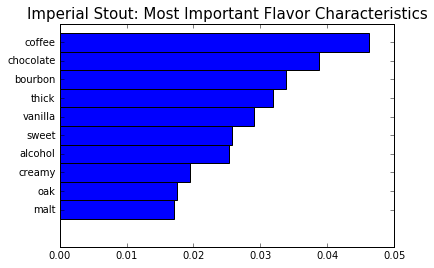

In [4]:
forest = RandomForestClassifier(n_estimators = 150) 
b = np.asarray(ImpStouts_data['User_Rating'], dtype="|S6")
forest = forest.fit(ImpStouts_features, b)

importances = forest.feature_importances_
imp = list(np.argpartition(importances, -10)[-10:])
ImpStouts_imp = []
ImpStouts_imp_vocab = []
for i in range(len(imp)):
    ImpStouts_imp.append(importances[imp[i]])
    ImpStouts_imp_vocab.append(ImpStouts_vocab[imp[i]])
    
sorted_imp = sorted(zip(ImpStouts_imp, ImpStouts_imp_vocab), key=lambda tup: tup[0])

labels = [textwrap.fill(text,12) for text in list(zip(*sorted_imp)[1])]
N = len(labels)
x = range(N)
width = 1
p = plt.barh(x, list(zip(*sorted_imp)[0]), width, color='b', align='center')
p = plt.yticks(x, labels, ha = 'right')
p = plt.title('Imperial Stout: Most Important Flavor Characteristics', fontsize = 15)

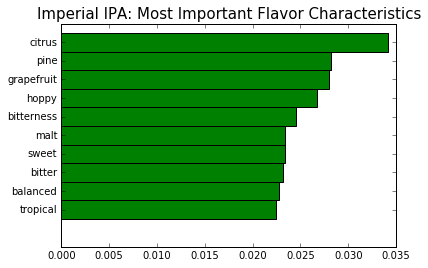

In [5]:
forest = RandomForestClassifier(n_estimators = 150) 
b = np.asarray(DIPAs_data['User_Rating'], dtype="|S6")
forest = forest.fit(DIPAs_features, b)

importances = forest.feature_importances_
imp = list(np.argpartition(importances, -10)[-10:])
DIPAs_imp = []
DIPAs_imp_vocab = []
for i in range(len(imp)):
    DIPAs_imp.append(importances[imp[i]])
    DIPAs_imp_vocab.append(DIPAs_vocab[imp[i]])
    
sorted_imp = sorted(zip(DIPAs_imp, DIPAs_imp_vocab), key=lambda tup: tup[0])

labels = [textwrap.fill(text,12) for text in list(zip(*sorted_imp)[1])]
N = len(labels)
x = range(N)
width = 1
p = plt.barh(x, list(zip(*sorted_imp)[0]), width, color='g', align='center')
p = plt.yticks(x, labels, ha = 'right')
p = plt.title('Imperial IPA: Most Important Flavor Characteristics', fontsize = 15)

In [6]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')